In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:

x = Flatten()(vgg.output)
x = Dropout(0.25)(x)
prediction = Dense(58, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
train_generator = ImageDataGenerator(validation_split=0.20,rescale=1./255, shear_range=0.1,
    zoom_range=0.1,preprocessing_function = preprocess_input)
image_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
# Create Data Loaders
train_loader = train_generator.flow_from_directory(
    directory = "/kaggle/input/training-handwritten-marathi-character-fusion/Data_set",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    class_mode='categorical',
    subset='training',
    seed=42
)

valid_loader = train_generator.flow_from_directory(
    directory = "/kaggle/input/training-handwritten-marathi-character-fusion/Data_set",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    class_mode='categorical',
    subset='validation',
    seed=42
)

test_loader = image_generator.flow_from_directory(
    directory = "/kaggle/input/handwritten-marathi-character-dataset-of-4-people/Testing_Data",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    seed=42
)


Found 13348 images belonging to 58 classes.
Found 3305 images belonging to 58 classes.
Found 232 images belonging to 58 classes.


In [ ]:

from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
# Train and Test Steps
steps_train = len(train_loader)    # = round(num_train_images / batch_size)
steps_valid = len(valid_loader)

     

In [ ]:
model_history=model.fit_generator(
  train_loader,
  validation_data=valid_loader,
  epochs=32,
  steps_per_epoch=steps_train,
  validation_steps=steps_valid,
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/32
418/418 [==============================] - 351s 824ms/step - loss: 0.0919 - accuracy: 0.0211 - val_loss: 0.0873 - val_accuracy: 0.0233
Epoch 2/32
418/418 [==============================] - 338s 808ms/step - loss: 0.0879 - accuracy: 0.0179 - val_loss: 0.0876 - val_accuracy: 0.0233
Epoch 3/32
418/418 [==============================] - 339s 810ms/step - loss: 0.0921 - accuracy: 0.0170 - val_loss: 0.0872 - val_accuracy: 0.0185
Epoch 4/32
418/418 [==============================] - 338s 809ms/step - loss: 0.0736 - accuracy: 0.1933 - val_loss: 0.0392 - val_accuracy: 0.6036
Epoch 5/32
418/418 [==============================] - 341s 817ms/step - loss: 0.0286 - accuracy: 0.7306 - val_loss: 0.0223 - val_accuracy: 0.8009
Epoch 7/32
418/418 [==============================] - 344s 822ms/step - loss: 0.0206 - accuracy: 0.8264 - val_loss: 0.0193 - val_accuracy: 0.8306
Epoch 8/32
418/418 [==============================] - 346s 826ms/step - loss: 0.0157 - accuracy: 0.8774 - val_loss: 0.0167 -

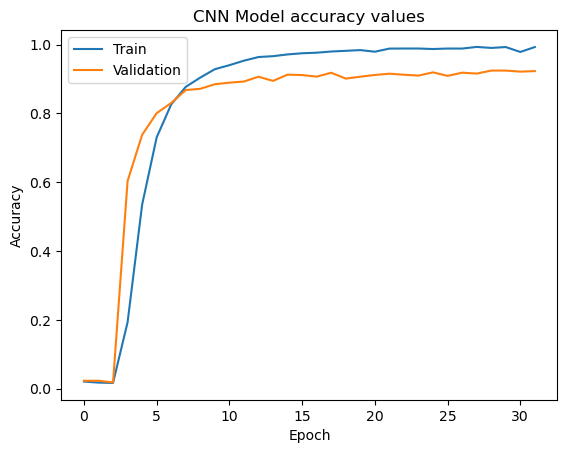

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loader = image_generator.flow_from_directory(
    directory = "/kaggle/input/handwritten-marathi-character-dataset-of-4-people/Testing_Data/",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    seed=42
)

model.evaluate(test_loader)

Found 232 images belonging to 58 classes.
8/8 [==============================] - 3s 348ms/step - loss: 9.4408 - accuracy: 0.6207


[9.440812110900879, 0.6206896305084229]